In [ ]:
from google.colab import files
files.upload()

Saving lena.jpg to lena.jpg
Saving img_b.jpg to img_b.jpg


{'lena.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x0b\x08\x01\xfc\x01\xfd\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x04\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x05\x07\x08\t\x03\x04\n\x02\x01\x00\x0b\xff\xc4\x00F\x10\x00\x02\x02\x02\x01\x03\x03\x03\x03\x03\x02\x06\x01\x01\x00\x13\x01\x02\x03\x04\x05\x11\x12\x06\x13!\x00\x071\x08\x14"#2A\t\x15QBa\x16$3Rq\x81\x91\xa1\x17%Cb\xb1\xf0\n\x184r\xc1&\x82\xd15S\x83\xe1\xf1\xff\xda\x00\x08\x01\x01\x00\x00?\x00\x9f\xa9|w\x16TA\xc9\xdc\x08\xb9\xb2\xa2\xf8`\x06\xf9\x15\x1a\xdf\x8f?:\xf1\xfe\xc9\x97\xedI\xfa\xdd\xb8\xe3\x99fh\xcf0u\xa6\x86\xd4\xdcF\x98\x83\xb1\x03\xf2\xf0\x08\xff\x00N\xcbx\xf4\x9fnYK\xc6\xc5\x10\xa0\x1

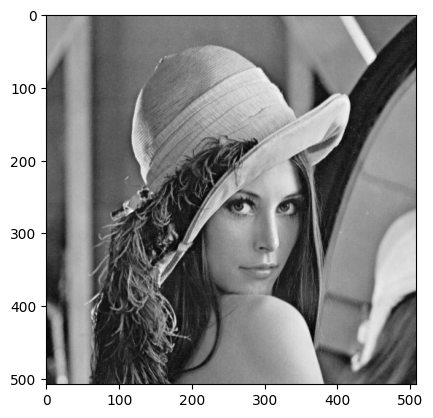

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
img = plt.imread('lena.jpg')
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
#transformée bidimensionnelle discrète de Fourier
tf = np.fft.fft2(img)
print(tf)

[[ 3.20801010e+07+1.74622983e-10j -4.28225509e+05+2.37409369e+06j
   1.53553769e+06-1.13296642e+06j ... -1.79879236e+05-6.55431946e+05j
   1.53553769e+06+1.13296642e+06j -4.28225509e+05-2.37409369e+06j]
 [-4.53312037e+03-1.20661668e+06j -1.52968349e+06+1.62128168e+06j
  -1.09005269e+06+1.55195911e+05j ...  6.30842725e+05+8.01247390e+05j
  -3.34939539e+05+4.32437869e+05j  3.87495793e+04+9.39280285e+05j]
 [-4.54234340e+05-1.51222474e+05j -2.82969008e+05-7.57380580e+04j
   6.49620202e+05-4.60546349e+05j ...  3.43512562e+05+9.38558889e+05j
  -6.93132669e+05-1.89781217e+05j  8.16968576e+05-2.38997089e+04j]
 ...
 [ 4.95925013e+05-2.29295713e+05j  7.54834082e+05+6.95878991e+05j
  -5.33911018e+05-1.71590876e+05j ...  9.94650057e+05+1.39134383e+05j
   1.26936995e+05-6.38585752e+05j -7.46153233e+04+5.90901137e+05j]
 [-4.54234340e+05+1.51222474e+05j  8.16968576e+05+2.38997089e+04j
  -6.93132669e+05+1.89781217e+05j ... -5.06908109e+05-7.86158241e+05j
   6.49620202e+05+4.60546349e+05j -2.82969008e+

In [ ]:
print(img.shape)
print(tf.shape)

(508, 509)
(508, 509)


In [ ]:
# Calculer le module
module= np.abs(tf)
#print(module)

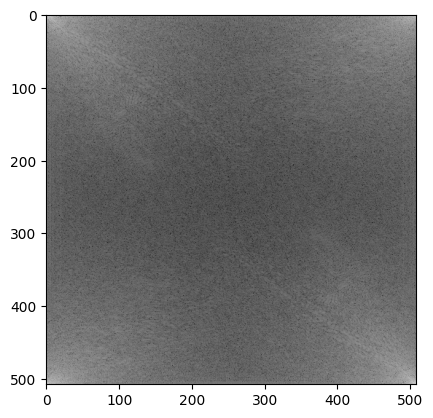

In [ ]:
 #afficher le résultat suivant une échelle logarithmique des intensités
log = np.log(module)
plt.imshow(log, cmap='gray')
plt.show()

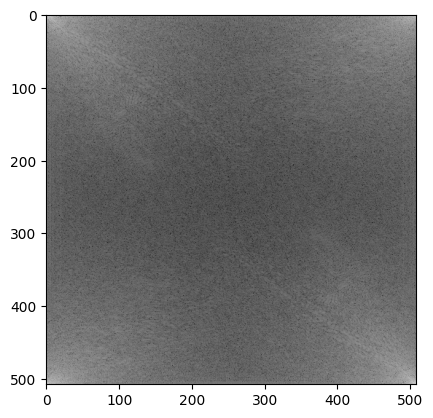

In [ ]:
from numpy.fft.helper import fftshift
tfi = np.fft.ifft2(img)
log1 = np.log(np.abs(tfi))
plt.imshow(log1,cmap='gray')
plt.show()

<ipython-input-10-c8132c754587>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fshift)),cmap='gray')


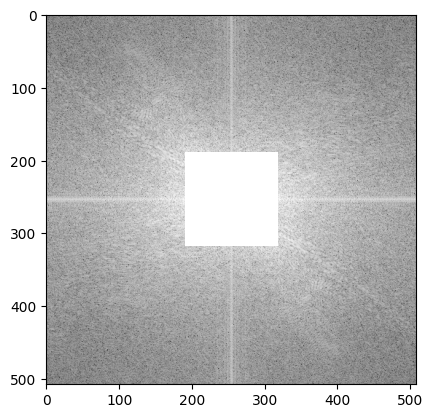

In [ ]:
fshift = np.fft.fftshift(tfi)
# Supprimer 25% des coefficients complexes au centre
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
fshift[crow-rows//8:crow+rows//8, ccol-cols//8:ccol+cols//8] = 0
plt.imshow(np.log(np.abs(fshift)),cmap='gray')
plt.show()

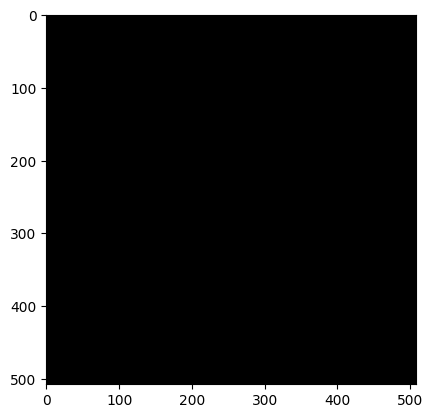

In [ ]:
# Supprimer 25% des coefficients complexes au bord  
pourcentage = 0.15
num_rows = int(np.sqrt(pourcentage * rows / cols))
num_cols = int(np.sqrt(pourcentage* cols / rows))
# Définir les indices de début et de fin des pixels à supprimer
srow = int(rows / 2 - num_rows / 2)
erow = int(rows / 2 + num_rows / 2)
scol = int(cols / 2 - num_cols / 2)
ecol = int(cols / 2 + num_cols / 2)
imgtf = np.fft.fft2(img)
# decaler les freq
imgShift= np.fft.fftshift(imgtf)
# Supprimer les coefficients autour des bords
imgShift[:srow, :] = 0
imgShift[erow:, :] = 0
imgShift[:, :scol] = 0
imgShift[:, ecol:] = 0
imgInv= np.fft.ifft2(np.fft.ifftshift(imgShift))
imgAbs = np.abs(imgInv)
plt.imshow(imgAbs,cmap='gray')
plt.show()